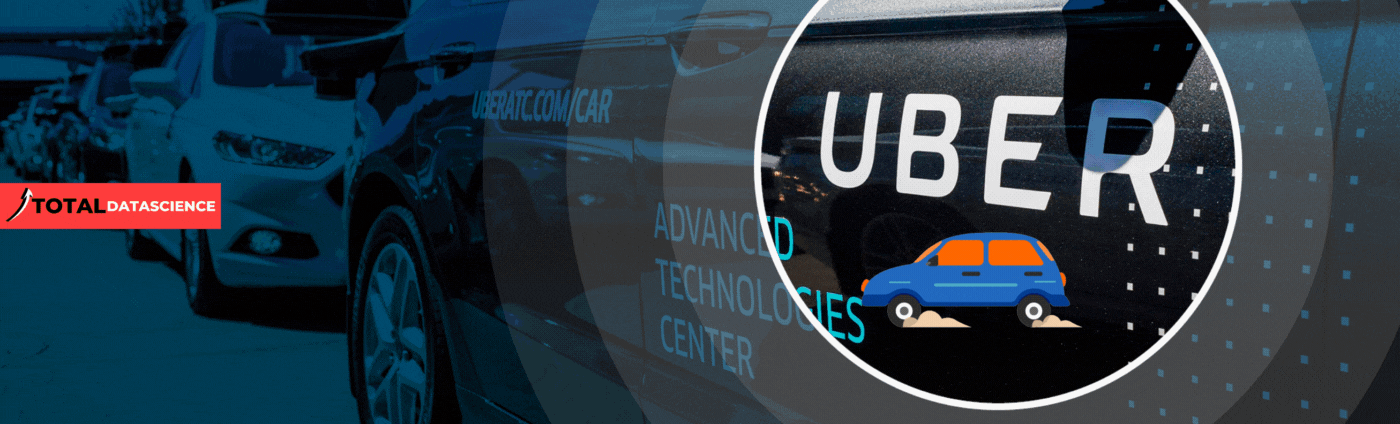

<br>

<br>

#**Uber Data Analysis With Python**

**Uber Technologies, Inc.**, commonly known as **Uber**, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

Used data regarding **Uber ride**


Used Python to analyze data from Uber. 

We will use Python to:


*   Check how long do people travel with Uber?
*   What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month
* The starting points of trips. Where Do People Start Boarding Their Trip From Most?




<br>

##**Import The Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [4]:
data=pd.read_csv('Uber Drives.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


##Check for Mising Values

Let's check below if there data points missing in our dataset.

In [7]:
data.shape

(1156, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [10]:
from scipy import stats as st
st.skew(data['MILES*'])

33.773712697254744

In [11]:
st.kurtosis(data['MILES*'])

1142.6986540537553

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MILES*', ylabel='Density'>

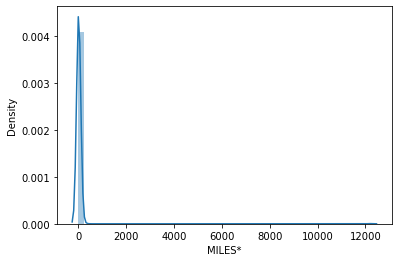

In [12]:
sns.distplot(data['MILES*'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES*'>

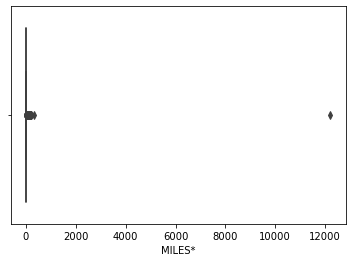

In [58]:
sns.boxplot(data['MILES*'])

In [13]:
np.percentile(data['MILES*'],75)

10.4

In [14]:
q99=np.percentile(data['MILES*'],99.9)

In [15]:
data['MILES*']=data['MILES*'].apply(lambda x: q99 if x>q99 else x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES*'>

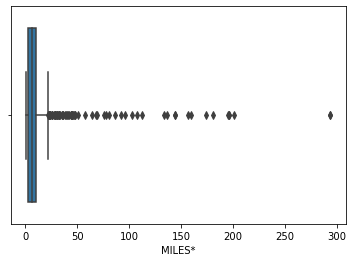

In [16]:
sns.boxplot(data['MILES*'])

In [17]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [18]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [19]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

we will drop all the NaN values in our dataset. 

In [20]:
data.dropna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [21]:
data=data.dropna()

In [22]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now we can see that there are not missing values in the dataset.

In [23]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [27]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [28]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


##**Categories We Have**

In [29]:
data.nunique()

START_DATE*    652
END_DATE*      652
CATEGORY*        2
START*         131
STOP*          137
MILES*         205
PURPOSE*        10
HOUR            23
DAY             31
DAY_OF_WEEK      7
MONTH           11
WEEKDAY          7
dtype: int64

In [30]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

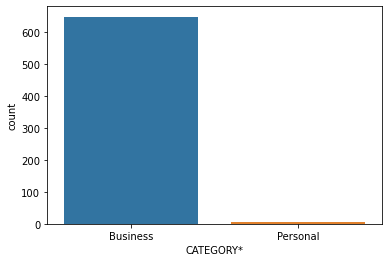

In [31]:
sns.countplot(x='CATEGORY*',data=data)

<AxesSubplot:>

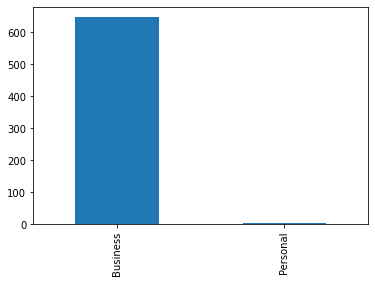

In [32]:
data['CATEGORY*'].value_counts().plot(kind='bar')

We have large number of business rides caegory as against very few personal rides.

##**How long do people travel with Uber?**

<AxesSubplot:ylabel='Frequency'>

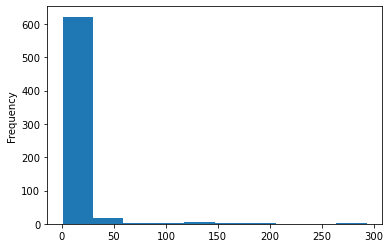

In [33]:
data['MILES*'].plot.hist()

mostly people travel in a short mile with Uber. 

##**What Hour Do Most People Take Uber To Their Destination?**

In [34]:
data['START_DATE*'].dt.hour.value_counts()

13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: START_DATE*, dtype: int64

Text(0.5, 1.0, 'Number of trips Vs hours')

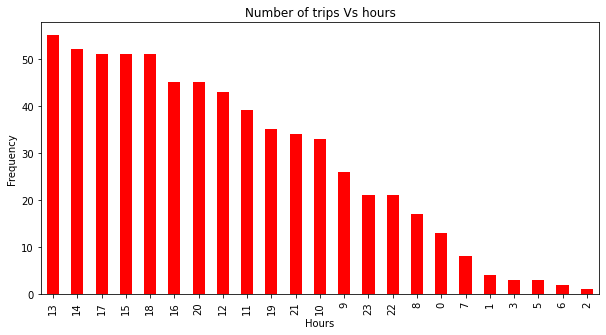

In [35]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

#**Check The Purpose Of Trips**

In [36]:
data['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

<AxesSubplot:>

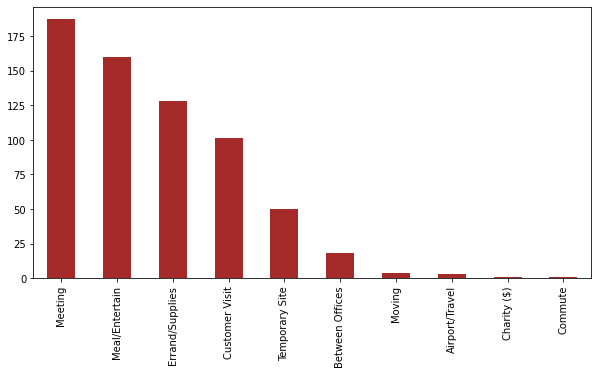

In [37]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can notice that mostly the purpose of the trip is meeting and meal/entertain.

##**Which Day Has The Highest Number Of Trips**

<AxesSubplot:>

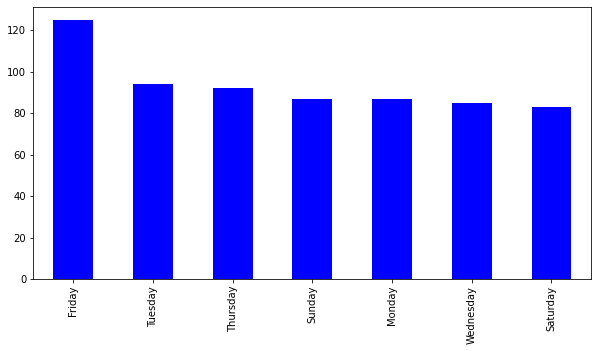

In [38]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

So Friday has the highest number of Trips.

##**What Are The Number Of Trips Per Each Day?**

<AxesSubplot:>

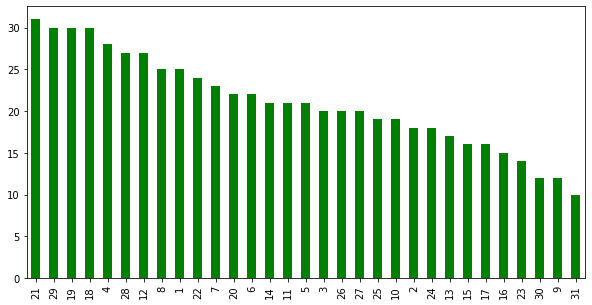

In [39]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

##**What Are The Trips In The Month**

<AxesSubplot:>

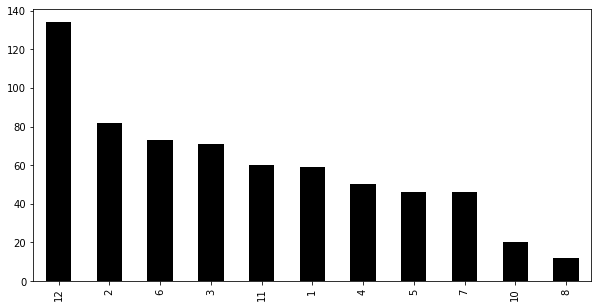

In [40]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

We can see that December(12) has the most trips.

##**The starting points of trips. Where Do People Start Boarding Their Trip From Most?**

<AxesSubplot:>

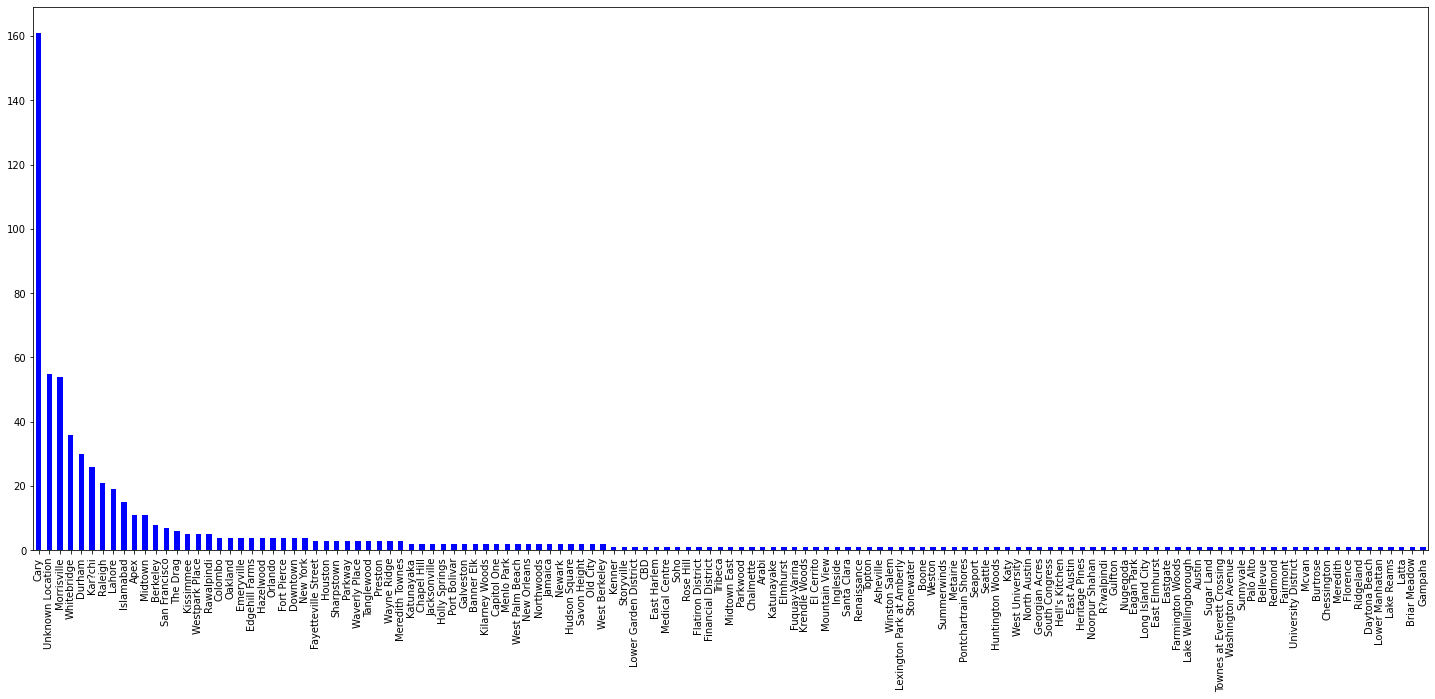

In [41]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Most people in this dataset starts their journey from **Cary** followed by some unknown location and then Morrisville.